<a href="https://colab.research.google.com/github/flinkflora17/ML_kurzus/blob/main/hazi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packagek

In [49]:
from tensorflow import keras
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import pandas as pd
from google.colab import files
import io
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Adatbázis beolvasása és formázása

In [17]:
uploaded = files.upload()

Saving weather_data_1hr.csv to weather_data_1hr (1).csv


In [81]:
weather = pd.read_csv(io.BytesIO(uploaded['weather_data_1hr.csv']))

In [82]:
weather.head()

,loc_id,date,time,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,1,2019-06-01,0,no,16,61,6,10,228,SW,...,16,61,12,54,16,61,7,12,16,61
1,1,2019-06-01,100,no,16,60,6,9,230,SW,...,16,60,12,53,16,60,7,11,16,60
2,1,2019-06-01,200,no,15,59,5,9,233,SW,...,15,59,11,53,15,59,6,10,15,59
3,1,2019-06-01,300,no,15,58,5,8,235,SW,...,15,58,11,52,14,58,6,9,14,58
4,1,2019-06-01,400,no,15,59,4,7,229,SW,...,15,59,11,52,15,59,5,8,15,59


In [83]:
weather.shape

(1464, 31)

In [84]:
weather = weather.drop(labels = ['loc_id', 'time', 'tempF', 'windspeedMiles', 'date'], axis = 1)

In [85]:
weather.head()

,isdaytime,tempC,windspeedKmph,winddirdegree,winddir16point,weatherCode,weatherIconUrl,weatherDesc,precipMM,precipInches,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,no,16,10,228,SW,116,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,0.0,0.0,...,16,61,12,54,16,61,7,12,16,61
1,no,16,9,230,SW,116,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,0.0,0.0,...,16,60,12,53,16,60,7,11,16,60
2,no,15,9,233,SW,116,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,0.0,0.0,...,15,59,11,53,15,59,6,10,15,59
3,no,15,8,235,SW,116,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,0.0,0.0,...,15,58,11,52,14,58,6,9,14,58
4,no,15,7,229,SW,116,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,0.0,0.0,...,15,59,11,52,15,59,5,8,15,59


In [86]:
weather = weather.drop(labels = ['winddir16point', 'weatherIconUrl', 'precipInches', 'visibilityMiles', 'pressureInches',
                                 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF'], axis = 1)

In [87]:
weather.isna().sum()

isdaytime        0
tempC            0
windspeedKmph    0
winddirdegree    0
weatherCode      0
weatherDesc      0
precipMM         0
humidity         0
visibilityKm     0
pressureMB       0
cloudcover       0
HeatIndexC       0
DewPointC        0
WindChillC       0
WindGustKmph     0
FeelsLikeC       0
dtype: int64

In [88]:
weather.head()
weather = weather.drop('isdaytime', axis = 1)

In [89]:
from pandas import unique

In [90]:
weather.weatherDesc.unique()

array(['Partly cloudy', 'Cloudy', 'Overcast', 'Light drizzle',
       'Light rain shower', 'Patchy rain possible', 'Moderate rain',
       'Moderate rain at times', 'Light rain', 'Heavy rain',
       'Patchy light rain', 'Moderate or heavy rain shower',
       'Moderate or heavy rain with thunder', 'Torrential rain shower',
       'Clear', 'Sunny'], dtype=object)

In [91]:
laberer = LabelEncoder()
weather.weatherDesc = laberer.fit_transform(weather.weatherDesc)

In [92]:
weather.head()

,tempC,windspeedKmph,winddirdegree,weatherCode,weatherDesc,precipMM,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC
0,16,10,228,116,11,0.0,77,10,1023,7,16,12,16,12,16
1,16,9,230,116,11,0.0,78,10,1023,6,16,12,16,11,16
2,15,9,233,116,11,0.0,79,10,1022,5,15,11,15,10,15
3,15,8,235,116,11,0.0,79,10,1022,4,15,11,14,9,14
4,15,7,229,116,11,0.0,77,10,1022,4,15,11,15,8,15


In [93]:
weather.weatherDesc.unique()

array([11,  1, 10,  3,  5, 13,  8,  9,  4,  2, 12,  6,  7, 15,  0, 14])

In [94]:
description = {
    '0' : 'Partly Cloudy',
    '1' : 'Felhos',
    '2' : 'Overcast',
    '3' : 'Light Drizzle',
    '4' : 'Light rain shower',
    '5' : 'Patchy rain possible',
    '6' : 'Moderate rain',
    '7' : 'Moderate rain at times',
    '8' : 'Light rain',
    '9' : 'Heavy rain',
    '10' : 'Patchy light rain',
    '11' : 'Moderate or heavy rain shower',
    '12' : 'Moderate or heavy rain with thunder',
    '13' : 'Torrential rain shower',
    '14' : 'Clear',
    '15' : 'Sunny'
}

# train és teszt

In [95]:
# x,y szétszedés
y = weather['FeelsLikeC'].copy()
y = y.drop(0, axis = 0)

x = weather.copy().drop('FeelsLikeC', axis = 1)
x = x.drop( index = weather.shape[0]-1, axis = 0)

In [96]:
print(x.shape, y.shape)

(1463, 14) (1463,)


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True)

In [98]:
# normalizálás

normalizer=StandardScaler()
normalizer.fit(x_train)
x_train = normalizer.transform(x_train)
x_test = normalizer.transform(x_test)

## Architektúra

In [99]:
input1 = Input(shape=(x_train.shape[1]))
x = Dense(32, activation='relu')(input1)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output1 = Dense(1, activation='linear')(x)

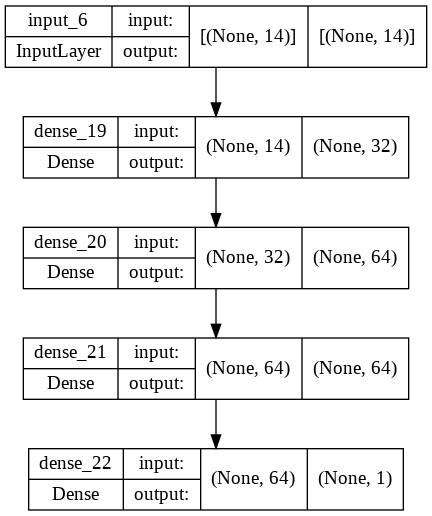

In [100]:
model = keras.Model(input1, output1)
plot_model(model, show_shapes=True)

In [101]:
# early stopping
early_stopping_callback = EarlyStopping(patience = 20, restore_best_weights = True)
model.compile(optimizer = 'adam', loss = 'MSE')

In [102]:
model.fit(x = x_train, y = y_train, epochs = 200, validation_split = 0.1, callbacks = [early_stopping_callback])

Epoch 1/200
37/37 [==============================] - 1s 6ms/step - loss: 266.8518 - val_loss: 122.6702
Epoch 2/200
37/37 [==============================] - 0s 3ms/step - loss: 40.3516 - val_loss: 23.1296
Epoch 3/200
37/37 [==============================] - 0s 3ms/step - loss: 15.4109 - val_loss: 14.3496
Epoch 4/200
37/37 [==============================] - 0s 4ms/step - loss: 9.6353 - val_loss: 10.3234
Epoch 5/200
37/37 [==============================] - 0s 4ms/step - loss: 6.9476 - val_loss: 7.6133
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 5.5267 - val_loss: 6.2789
Epoch 7/200
37/37 [==============================] - 0s 4ms/step - loss: 4.6454 - val_loss: 5.5180
Epoch 8/200
37/37 [==============================] - 0s 4ms/step - loss: 4.0247 - val_loss: 4.7285
Epoch 9/200
37/37 [==============================] - 0s 3ms/step - loss: 3.6091 - val_loss: 4.3229
Epoch 10/200
37/37 [==============================] - 0s 4ms/step - loss: 3.2427 - val_loss: 3.9198


In [103]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.9563


0.9562876224517822

In [104]:
prediction = model.predict(x_test[:4]) 
prediction

array([[19.539204],
       [23.634052],
       [25.079905],
       [13.229076]], dtype=float32)